In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 10.3 MB/s eta 0:00:00


In [3]:
pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.9 MB/s eta 0:00:00


In [4]:
from pykrx import stock

In [5]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [6]:
reset_seeds(42)

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np

In [9]:
DATA_PATH = "/content/drive/MyDrive/Final_Project/data/"

In [10]:
data = pd.read_csv(f"{DATA_PATH}labeled_data_final.csv")

In [11]:
import datetime as dt

end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220904 20230904


In [168]:
ticker = '069500' # KOSPI 200
end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(146)).strftime("%Y%m%d")
stock.get_etf_ohlcv_by_date(start,end,ticker)['종가']

날짜
2023-04-11    33575
2023-04-12    33680
2023-04-13    33745
2023-04-14    33865
2023-04-17    33875
              ...  
2023-08-29    33460
2023-08-30    33560
2023-08-31    33575
2023-09-01    33910
2023-09-04    34125
Name: 종가, Length: 100, dtype: uint32

In [12]:
def pad_str(str_list, target_len):

  padded_str_list = []
  for str in str_list:
    if len(str) < target_len:
      padded_str = "0" * (target_len - len(str)) + str
    else:
      padded_str = str
    padded_str_list.append(padded_str)
  return padded_str_list
str_list = data.Code.astype(str).to_list()
target_len = 6
padded_str_list = pad_str(str_list, target_len)

data.Code = padded_str_list

In [13]:
recommendation= data[((data['business'] == "A")|(data['business'] == "B")|(data['business'] == "C"))&
 ((data['performance'] == "A")|(data['performance'] == "B")|(data['performance'] == "A+")|(data['performance'] == "C"))&
  ((data['volitality'] == "A")|(data['volitality'] == "B")|(data['volitality'] == "A+")|(data['volitality'] == "C"))]
recommendation

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,2.870,12143.0,-1.04,C,C,D,B,F,A+,C
2,000660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,1.462,28792.0,26.96,D,C,C,C,H,A,B
4,005490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,4.364,99067.0,8.11,B,C,D,B,G,B,B
5,051910,LG화학,KOSPI,4.0,7.059230e+07,399881.0,287432.0,0.36433,6.50,0.000188,...,1.438,81652.0,14.63,D,C,D,B,G,B,C
7,005380,현대차,KOSPI,4.0,2.028760e+08,699789.0,594572.0,0.22792,4.89,0.000088,...,3.058,53685.0,-2.62,C,B,E,C,B,A,C
10,000270,기아,KOSPI,4.0,3.950820e+08,1446978.0,1229388.0,0.27907,17.01,0.000407,...,3.284,23820.0,-3.41,C,B,E,B,G,A,C
18,066570,LG전자,KOSPI,4.0,1.628850e+08,1065618.0,825302.0,0.26213,11.11,0.000518,...,0.912,36144.0,6.18,E,C,D,C,F,A,C
39,011200,HMM,KOSPI,3.2,4.890390e+08,1838939.0,2279608.0,0.30701,7.00,0.000117,...,3.430,22066.0,-1.80,C,C,E,A,H,A,A
58,011070,LG이노텍,KOSPI,4.0,2.366450e+07,235885.0,179614.0,0.28444,6.32,0.000281,...,0.680,91158.0,-3.29,E,C,E,B,H,B,C
109,039490,키움증권,KOSPI,4.0,2.481950e+07,106650.0,70016.0,0.31125,3.37,0.000165,...,1.676,161107.0,-0.58,D,B,E,A,F,B,C


In [14]:
stocks = recommendation["Name"].to_list()
tmp = pd.DataFrame()
for n in stocks:
  tmp[n] = stock.get_market_ohlcv(start, end, data[data['Name'] == n]['Code'])['종가']
tmp

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-09-05,57100,91100,252500,616000,200000,81000,97200,20600,338000,82400,408000,76900,300000
2022-09-06,57100,91800,252500,619000,201000,81400,96800,20400,336000,81900,429500,76200,304500
2022-09-07,56000,90400,246000,623000,202000,82300,94400,19650,332000,79800,422500,72600,300000
2022-09-08,55600,90400,241500,644000,200000,80900,93800,20000,337500,80900,419500,72100,304500
2022-09-13,58100,94800,248000,665000,200500,81300,97900,21050,364000,85900,430000,73500,312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-29,66800,118600,583000,560000,186700,80200,99600,17500,264500,102300,444500,114100,324500
2023-08-30,67100,119400,580000,576000,187800,80400,100100,17030,268000,102700,447000,113500,326500
2023-08-31,66900,121800,579000,583000,189100,80200,98500,16660,270000,103300,452000,117600,331000


In [15]:
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]

In [16]:
tmp2 = pd.DataFrame((annual_ret-0.035)/daily_ret.std()*np.sqrt(tmp[stocks].shape[0]),columns= ['Shape']).sort_values(by='Shape',ascending=False)
tmp2

,Shape
POSCO홀딩스,797.157745
두산,305.965466
삼성전자,266.944886
SK하이닉스,232.003200
키움증권,189.869705
효성티앤씨,160.675599
효성첨단소재,99.388100
LG전자,48.810076
LG화학,-7.924924
기아,-9.929510


In [17]:
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정

In [18]:
stocks

['POSCO홀딩스', '두산', '삼성전자', 'SK하이닉스', '키움증권']

In [19]:
tmp_stocks = tmp[stocks]
tmp_stocks

,POSCO홀딩스,두산,삼성전자,SK하이닉스,키움증권
날짜,,,,,
2022-09-05,252500,76900,57100,91100,82400
2022-09-06,252500,76200,57100,91800,81900
2022-09-07,246000,72600,56000,90400,79800
2022-09-08,241500,72100,55600,90400,80900
2022-09-13,248000,73500,58100,94800,85900
...,...,...,...,...,...
2023-08-29,583000,114100,66800,118600,102300
2023-08-30,580000,113500,67100,119400,102700
2023-08-31,579000,117600,66900,121800,103300


### 주가수익률을 복리로 해야하는 이유
1. 주가수익률은 복리로 계산하는 것이 합리적이다.
> 예를들어 1000원투자 후 1년 뒤 수익금이 100원올라 1100원이 된 뒤 다시 1년뒤 10% 수익이 발생하면 1100*1.1 = 1210

In [20]:
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]

In [21]:
port_ret = []
port_risk = []
port_weights = []
shape_ratio = []
rf = 0.0325

for i in range(30000):

    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)


    returns = np.dot(weights, annual_ret)


    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    shape_ratio.append(returns/risk)

portfolio = {'Returns' : port_ret, 'Risk' : port_risk, 'Shape' : shape_ratio}
for j, s in enumerate(stocks):
    portfolio[s] = [weight[j] for weight in port_weights]

df = pd.DataFrame(portfolio)
max_shape = df.loc[df['Shape'] == df['Shape'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]
tmp2 = df.groupby('Risk')[['Returns']].max().reset_index()

In [22]:
best_ret = tmp2.loc[0,'Returns']
for i in range(tmp2.shape[0]):
  if tmp2.loc[i,'Returns']<best_ret:
    tmp2.drop(index=i,inplace=True)
  else:
    best_ret = tmp2.loc[i,'Returns']

In [23]:
max_shape

,Returns,Risk,Shape,POSCO홀딩스,두산,삼성전자,SK하이닉스,키움증권
2134,1.055452,0.301547,3.500125,0.596385,0.141092,0.134248,0.1191,0.009174


In [24]:
min_risk

,Returns,Risk,Shape,POSCO홀딩스,두산,삼성전자,SK하이닉스,키움증권
20535,0.517876,0.213493,2.42573,0.171442,0.055058,0.701736,0.03609,0.035673


### 로그수익률을 사용하는 이유
1. 복리효과를 고려할 수 있다.
2. 주식 가격의 장기적인 수익률을 더 정확하게 추정할 수 있다 > 정규분포
3. 로그수익률분포를 정규분포로 가정할 수 있음.
> 즉, 복리효과를 고려하여 주식 가격의 미래 가격을 조금 더 정확하게 예측할 수 있음.
> 로그 수익률의 분포를 이용하여 다양한 시나리오를 고려할 수 있음.

## 기하 브라운 운동 사용이유
1. 지난 1년간 주식시장이 호황이었는데, 추세를 반영하지 못한다면 좋은 시뮬레이션이 되지 못할 것이라고 판단했다.
많은 금융 이론들에서 주가의 움직임은 앞으로의 방향을
예측할 수 없는 랜덤워크(Random Walk)와 같다고
전제하고 있다. 하지만 주가에는 변동성뿐만 아니라 추세도
포함되어 있기 때문에 주가의 움직임을 단순히 랜덤하게
움직인다고 설명하기엔 부족하다. 이를 보완하고자 주가의
기대수익률(추세) 와 변동성을 사용해 얻은 모형이
GBM 이다.

In [25]:
z = np.random.normal(0, 1, (90,1000))

In [26]:
(1000* np.exp((0.2 - 0.5 * 0.03 ** 2) * (1/250) + 0.03 * z * np.sqrt(1/250))).shape

(90, 1000)

In [27]:
# T 시뮬레이션 시간
# dt 시간 간격

# 기하 브라운 운동을 구현하는 함수
def geometric_brownian_motion(tmp, S0, T=100, dt=1/100):
    """
    S0: 초기값
    mu: 평균
    sigma: 표준 편차
    T: 시뮬레이션 시간
    dt: 시간 간격
    """

    # Brownian motion
    W = np.random.normal(0, 1, (T, 1))

    daily_returns = tmp.pct_change().dropna()

    # 연간 수익률
    mean_return = daily_returns.mean()
    annual_return =((1 + mean_return) ** T) - 1

    # 변동성 계산
    mu = annual_return/T
    sigma = daily_returns.std()

    X = np.zeros((T, 1))
    X[0] = S0
    for t in range(1, T):
        X[t] = X[t - 1] * np.exp((mu - sigma ** 2 / 2) * dt + sigma * W[t])

    return X

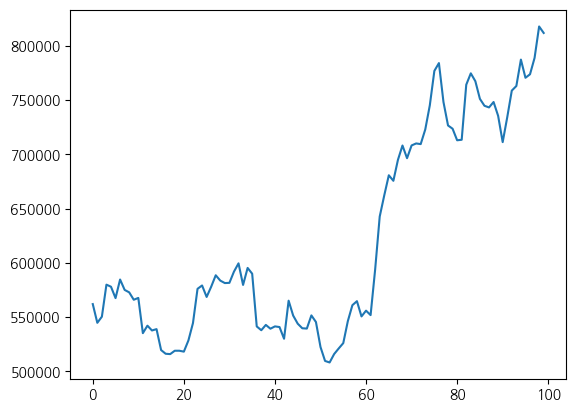

In [28]:
# 시뮬레이션을 실행합니다.
X = geometric_brownian_motion(tmp[stocks[0]],tmp[stocks[0]][-1])

# 결과를 시각화합니다.
plt.plot(X)
plt.show()

In [29]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance
stock_money

,POSCO홀딩스,두산,삼성전자,SK하이닉스,키움증권
2134,596385.457341,141091.545186,134248.368727,119100.236061,9174.392685


In [30]:
def monte_sim(sim_num,tmp,stocks,stock_money,day=100):
    np.random.seed(42)
    sim_num = sim_num
    balance_df = pd.DataFrame(np.zeros((sim_num,day)))
    for i in range(len(stocks)):
        X = []
        for k in range(sim_num):
            X.append(geometric_brownian_motion(tmp[stocks[i]],stock_money[stocks[i]].iloc[0]))
        balance_df += pd.DataFrame(np.array(X).reshape(sim_num,day))
    return balance_df.T

In [31]:
balance_df = monte_sim(1000,tmp,stocks,stock_money)
balance_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06
1,9.932865e+05,9.839883e+05,1.009255e+06,9.878236e+05,9.847343e+05,1.035036e+06,9.796893e+05,1.018907e+06,1.002285e+06,9.930744e+05,...,990134.723018,1.026413e+06,1.003340e+06,9.947021e+05,1.002609e+06,9.921671e+05,1.012043e+06,9.957496e+05,998389.415578,9.907444e+05
2,1.003653e+06,9.763101e+05,1.026398e+06,1.001534e+06,9.805476e+05,1.011591e+06,9.838197e+05,1.002969e+06,1.011322e+06,9.976483e+05,...,991602.829467,1.028634e+06,1.008493e+06,9.893982e+05,1.001844e+06,1.001742e+06,1.003981e+06,9.975054e+05,976744.165612,9.855900e+05
3,1.023686e+06,9.653550e+05,1.047083e+06,1.018750e+06,9.859685e+05,1.017239e+06,1.008759e+06,9.787760e+05,9.976117e+05,1.024792e+06,...,968704.498485,1.042357e+06,1.018301e+06,9.918096e+05,1.042406e+06,1.010065e+06,9.991824e+05,1.004036e+06,951957.428020,9.331268e+05
4,1.019420e+06,9.638514e+05,1.009919e+06,1.010515e+06,9.860227e+05,1.004545e+06,1.024433e+06,9.454511e+05,9.836816e+05,1.021364e+06,...,968673.283574,1.059193e+06,1.030647e+06,9.874896e+05,1.071802e+06,9.784667e+05,1.028503e+06,1.005129e+06,950013.096441,9.366142e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.394323e+05,1.041238e+06,1.019009e+06,1.223415e+06,1.063350e+06,7.941992e+05,1.119842e+06,8.762500e+05,1.528136e+06,9.833132e+05,...,924299.087813,9.683297e+05,9.265795e+05,1.158686e+06,9.549139e+05,8.003541e+05,1.013066e+06,1.083222e+06,744757.388732,1.172595e+06
96,8.358945e+05,1.028868e+06,1.035476e+06,1.185452e+06,1.039186e+06,7.881082e+05,1.126591e+06,8.760350e+05,1.518021e+06,1.022405e+06,...,896564.167075,9.703011e+05,9.099585e+05,1.166246e+06,9.230764e+05,8.058078e+05,1.017468e+06,1.067539e+06,750981.402950,1.155764e+06
97,8.499480e+05,1.033688e+06,1.049068e+06,1.224111e+06,1.038531e+06,7.814063e+05,1.107842e+06,8.915894e+05,1.517178e+06,1.037515e+06,...,897370.689509,9.505600e+05,9.166522e+05,1.136382e+06,8.899893e+05,8.051560e+05,1.011105e+06,1.083390e+06,751839.066468,1.165582e+06
98,8.493551e+05,1.031694e+06,1.058460e+06,1.231015e+06,1.027493e+06,7.911599e+05,1.127292e+06,8.916087e+05,1.554402e+06,1.028488e+06,...,910102.424281,9.273213e+05,9.372007e+05,1.153149e+06,9.042050e+05,8.045533e+05,1.012548e+06,1.082796e+06,754570.235426,1.162913e+06


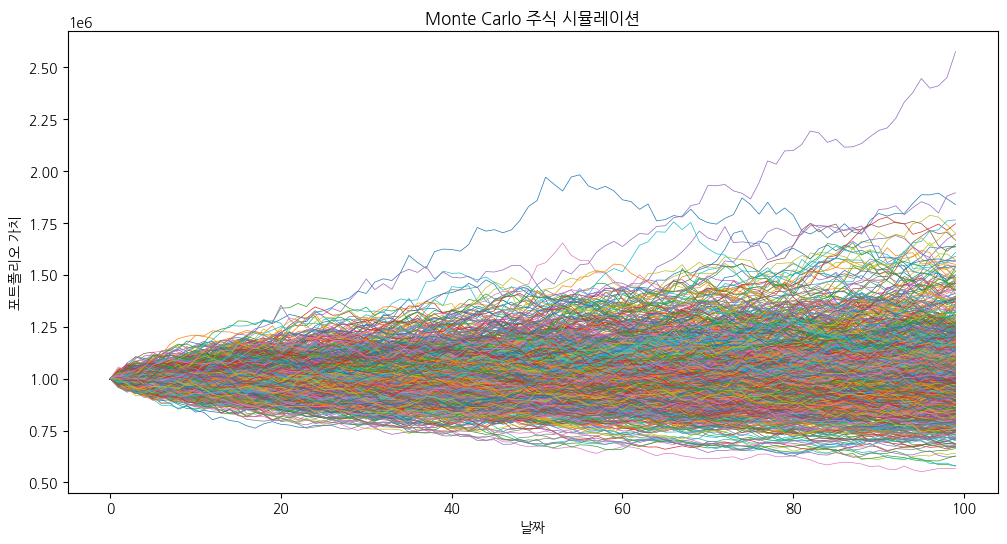

In [32]:
plt.figure(figsize=(12, 6))
sim_num = 1000
for i in range(sim_num):
    plt.plot(balance_df.index, balance_df.iloc[:, i], lw=0.5)

plt.title('Monte Carlo 주식 시뮬레이션')
plt.xlabel('날짜')
plt.ylabel('포트폴리오 가치')
plt.show()

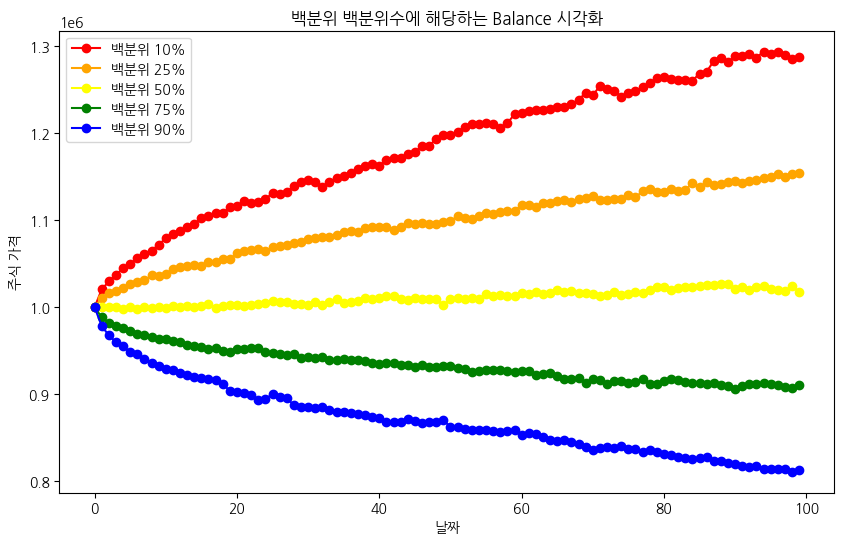

In [109]:
import matplotlib.pyplot as plt

# 데이터셋에서 백분위 n0%에 해당하는 열
top_10_percentile = balance_df.quantile(0.9, axis=1)
top_25_percentile = balance_df.quantile(0.75, axis=1)
top_50_percentile = balance_df.quantile(0.5, axis=1)
top_75_percentile = balance_df.quantile(0.25, axis=1)
top_90_percentile = balance_df.quantile(0.1, axis=1)

# 시각화
plt.figure(figsize=(10, 6))

plt.plot(top_10_percentile, color='red', label='백분위 10%', marker='o')
plt.plot(top_25_percentile, color='orange', label='백분위 25%', marker='o')
plt.plot(top_50_percentile, color='yellow', label='백분위 50%', marker='o')
plt.plot(top_75_percentile, color='green', label='백분위 75%', marker='o')
plt.plot(top_90_percentile, color='blue', label='백분위 90%', marker='o')

plt.title('백분위 백분위수에 해당하는 Balance 시각화')
plt.xlabel('날짜')
plt.ylabel('주식 가격')
plt.legend()
plt.show()

In [52]:
import plotly.express as px

px.histogram(balance_df)

In [46]:
import plotly.express as px

# 100일 후 예상 수익
px.histogram(balance_df.iloc[-1])

In [56]:
# 20일(한 달) 예정 수익
days = 20
px.histogram(balance_df.iloc[days-1])

In [170]:
top_10_percentile_1st = balance_df.iloc[19].quantile(0.9)
top_25_percentile_1st = balance_df.iloc[19].quantile(0.75)
top_50_percentile_1st = balance_df.iloc[19].quantile(0.5)
top_75_percentile_1st = balance_df.iloc[19].quantile(0.25)
top_90_percentile_1st = balance_df.iloc[19].quantile(0.1)

top_10_percentile_2nd = balance_df.iloc[39].quantile(0.9)
top_25_percentile_2nd = balance_df.iloc[39].quantile(0.75)
top_50_percentile_2nd = balance_df.iloc[39].quantile(0.5)
top_75_percentile_2nd = balance_df.iloc[39].quantile(0.25)
top_90_percentile_2nd = balance_df.iloc[39].quantile(0.1)

top_10_percentile_3rd = balance_df.iloc[59].quantile(0.9)
top_25_percentile_3rd = balance_df.iloc[59].quantile(0.75)
top_50_percentile_3rd = balance_df.iloc[59].quantile(0.5)
top_75_percentile_3rd = balance_df.iloc[59].quantile(0.25)
top_90_percentile_3rd = balance_df.iloc[59].quantile(0.1)

top_10_percentile_4th = balance_df.iloc[79].quantile(0.9)
top_25_percentile_4th = balance_df.iloc[79].quantile(0.75)
top_50_percentile_4th = balance_df.iloc[79].quantile(0.5)
top_75_percentile_4th = balance_df.iloc[79].quantile(0.25)
top_90_percentile_4th = balance_df.iloc[79].quantile(0.1)

top_10_percentile_end = balance_df.iloc[-1].quantile(0.9)
top_25_percentile_end = balance_df.iloc[-1].quantile(0.75)
top_50_percentile_end = balance_df.iloc[-1].quantile(0.5)
top_75_percentile_end = balance_df.iloc[-1].quantile(0.25)
top_90_percentile_end = balance_df.iloc[-1].quantile(0.1)

top_10_daily_return = top_10_percentile.pct_change()[1:]
top_25_daily_return = top_25_percentile.pct_change()[1:]
top_50_daily_return = top_50_percentile.pct_change()[1:]
top_75_daily_return = top_75_percentile.pct_change()[1:]
top_90_daily_return = top_90_percentile.pct_change()[1:]

# 확률 수준 (예: 95% 신뢰 수준)
confidence_level = 0.95


data = pd.DataFrame()

data['1st_returns(%)'] = pd.DataFrame([top_10_percentile_1st/top_10_percentile.iloc[0],
                                   top_25_percentile_1st/top_25_percentile.iloc[0],top_50_percentile_1st/top_50_percentile.iloc[0],
                                   top_75_percentile_1st/top_75_percentile.iloc[0],top_90_percentile_1st/top_90_percentile.iloc[0]],
                                  index=['10%', '25%', '50%', "75%", "90%"]).round(2)

data['2nd_returns(%)'] = pd.DataFrame([top_10_percentile_2nd/top_10_percentile.iloc[0],
                                   top_25_percentile_2nd/top_25_percentile.iloc[0],top_50_percentile_2nd/top_50_percentile.iloc[0],
                                   top_75_percentile_2nd/top_75_percentile.iloc[0],top_90_percentile_2nd/top_90_percentile.iloc[0]],
                                  index=['10%', '25%', '50%', "75%", "90%"]).round(2)

data['3rd_returns(%)'] = pd.DataFrame([top_10_percentile_3rd/top_10_percentile.iloc[0],
                                   top_25_percentile_3rd/top_25_percentile.iloc[0],top_50_percentile_3rd/top_50_percentile.iloc[0],
                                   top_75_percentile_3rd/top_75_percentile.iloc[0],top_90_percentile_3rd/top_90_percentile.iloc[0]],
                                  index=['10%', '25%', '50%', "75%", "90%"]).round(2)

data['4th_returns(%)'] = pd.DataFrame([top_10_percentile_4th/top_10_percentile.iloc[0],
                                   top_25_percentile_4th/top_25_percentile.iloc[0],top_50_percentile_4th/top_50_percentile.iloc[0],
                                   top_75_percentile_4th/top_75_percentile.iloc[0],top_90_percentile_4th/top_90_percentile.iloc[0]],
                                  index=['10%', '25%', '50%', "75%", "90%"]).round(2)

data['final_returns(%)'] = pd.DataFrame([top_10_percentile_end/top_10_percentile.iloc[0],
                                   top_25_percentile_end/top_25_percentile.iloc[0],top_50_percentile_end/top_50_percentile.iloc[0],
                                   top_75_percentile_end/top_75_percentile.iloc[0],top_90_percentile_end/top_90_percentile.iloc[0]],
                                  index=['10%', '25%', '50%', "75%", "90%"]).round(2)

data

,1st_returns(%),2nd_returns(%),3rd_returns(%),4th_returns(%),final_returns(%)
10%,1.11,1.16,1.22,1.26,1.29
25%,1.06,1.09,1.11,1.13,1.15
50%,1.00,1.01,1.01,1.02,1.02
75%,0.95,0.94,0.93,0.91,0.91
90%,0.90,0.87,0.86,0.83,0.81


In [36]:
data = pd.DataFrame()
data['balance(원)'] = pd.DataFrame([top_10_percentile.iloc[-1],
                                top_25_percentile.iloc[-1],top_50_percentile.iloc[-1],
                                top_75_percentile.iloc[-1],top_90_percentile.iloc[-1]],
                               index=['10%','25%','50%',"75%","90%"]).astype(int)
data['returns(%)'] = pd.DataFrame([top_10_percentile.iloc[-1]/top_10_percentile.iloc[0],
                                   top_25_percentile.iloc[-1]/top_25_percentile.iloc[0],top_50_percentile.iloc[-1]/top_50_percentile.iloc[0],
                                   top_75_percentile.iloc[-1]/top_75_percentile.iloc[0],top_90_percentile.iloc[-1]/top_90_percentile.iloc[0]],
                                  index=['10%', '25%', '50%', "75%", "90%"]).round(2)
data['montly_returns(%)'] = pd.DataFrame([top_10_percentile.pct_change().mean()*20*100,
                                       top_25_percentile.pct_change().mean()*20*100,top_50_percentile.pct_change().mean()*20*100,
                                       top_75_percentile.pct_change().mean()*20*100, top_90_percentile.pct_change().mean()*20*100],
                                index=['10%','25%','50%',"75%","90%"]).round(2)
data['montly_risk(%)'] = pd.DataFrame([top_10_percentile.pct_change().std()*np.sqrt(20)*100,
                                    top_25_percentile.pct_change().std()*np.sqrt(20)*100, top_50_percentile.pct_change().std()*np.sqrt(20)*100,
                                    top_75_percentile.pct_change().std()*np.sqrt(20)*100, top_90_percentile.pct_change().std()*np.sqrt(20)*100],
                                   index=['10%','25%','50%',"75%","90%"]).round(2)

#data['VaR(%)'] = var = pd.DataFrame([np.quantile(top_10_daily_return, (1 - confidence_level))*100,
#                                  np.quantile(top_25_daily_return, (1 - confidence_level))*100, np.quantile(top_50_daily_return, (1 - confidence_level))*100,
#                                  np.quantile(top_75_daily_return, (1 - confidence_level))*100, np.quantile(top_90_daily_return, (1 - confidence_level))*100],
#                                 index=['10%','25%','50%',"75%","90%"]).round(2)

data.transpose()

,10%,25%,50%,75%,90%
balance(원),1287626.00,1154152.00,1017787.00,910364.00,813580.00
returns(%),1.29,1.15,1.02,0.91,0.81
montly_returns(%),5.13,2.90,0.36,-1.89,-4.15
montly_risk(%),1.68,1.16,1.07,1.13,1.64


In [186]:
balance_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06
1,9.932865e+05,9.839883e+05,1.009255e+06,9.878236e+05,9.847343e+05,1.035036e+06,9.796893e+05,1.018907e+06,1.002285e+06,9.930744e+05,...,990134.723018,1.026413e+06,1.003340e+06,9.947021e+05,1.002609e+06,9.921671e+05,1.012043e+06,9.957496e+05,998389.415578,9.907444e+05
2,1.003653e+06,9.763101e+05,1.026398e+06,1.001534e+06,9.805476e+05,1.011591e+06,9.838197e+05,1.002969e+06,1.011322e+06,9.976483e+05,...,991602.829467,1.028634e+06,1.008493e+06,9.893982e+05,1.001844e+06,1.001742e+06,1.003981e+06,9.975054e+05,976744.165612,9.855900e+05
3,1.023686e+06,9.653550e+05,1.047083e+06,1.018750e+06,9.859685e+05,1.017239e+06,1.008759e+06,9.787760e+05,9.976117e+05,1.024792e+06,...,968704.498485,1.042357e+06,1.018301e+06,9.918096e+05,1.042406e+06,1.010065e+06,9.991824e+05,1.004036e+06,951957.428020,9.331268e+05
4,1.019420e+06,9.638514e+05,1.009919e+06,1.010515e+06,9.860227e+05,1.004545e+06,1.024433e+06,9.454511e+05,9.836816e+05,1.021364e+06,...,968673.283574,1.059193e+06,1.030647e+06,9.874896e+05,1.071802e+06,9.784667e+05,1.028503e+06,1.005129e+06,950013.096441,9.366142e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.394323e+05,1.041238e+06,1.019009e+06,1.223415e+06,1.063350e+06,7.941992e+05,1.119842e+06,8.762500e+05,1.528136e+06,9.833132e+05,...,924299.087813,9.683297e+05,9.265795e+05,1.158686e+06,9.549139e+05,8.003541e+05,1.013066e+06,1.083222e+06,744757.388732,1.172595e+06
96,8.358945e+05,1.028868e+06,1.035476e+06,1.185452e+06,1.039186e+06,7.881082e+05,1.126591e+06,8.760350e+05,1.518021e+06,1.022405e+06,...,896564.167075,9.703011e+05,9.099585e+05,1.166246e+06,9.230764e+05,8.058078e+05,1.017468e+06,1.067539e+06,750981.402950,1.155764e+06
97,8.499480e+05,1.033688e+06,1.049068e+06,1.224111e+06,1.038531e+06,7.814063e+05,1.107842e+06,8.915894e+05,1.517178e+06,1.037515e+06,...,897370.689509,9.505600e+05,9.166522e+05,1.136382e+06,8.899893e+05,8.051560e+05,1.011105e+06,1.083390e+06,751839.066468,1.165582e+06
98,8.493551e+05,1.031694e+06,1.058460e+06,1.231015e+06,1.027493e+06,7.911599e+05,1.127292e+06,8.916087e+05,1.554402e+06,1.028488e+06,...,910102.424281,9.273213e+05,9.372007e+05,1.153149e+06,9.042050e+05,8.045533e+05,1.012548e+06,1.082796e+06,754570.235426,1.162913e+06


In [228]:
portfolio_data = pd.DataFrame(top_10_percentile.pct_change()).dropna()

# KOSPI 200 데이터
ticker = '069500' # KOSPI 200
end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(146)).strftime("%Y%m%d")
kospi200 = stock.get_etf_ohlcv_by_date(start,end,ticker)['종가']
kospi_data = pd.DataFrame(kospi200.pct_change()).dropna().reset_index(drop=True)

# 두 데이터프레임을 합친 후 결측값 제거
merged_data = pd.concat([portfolio_data, kospi_data], axis=1).dropna()
merged_data

# 포트폴리오와 KOSPI 200의 공분산 계산
cov_matrix = np.cov(merged_data,rowvar=False)
#cov_matrix = np.cov(portfolio_data, kospi_data)

# 포트폴리오의 분산 계산
portfolio_variance = np.var(merged_data.iloc[:, :-1], axis=0).values

# 베타 계산
portfolio_beta = cov_matrix / portfolio_variance

# 포트폴리오 베타 값 출력
print("포트폴리오 베타 값:\n", portfolio_beta)

포트폴리오 베타 값:
 [[ 1.01030928 -0.4202707 ]
 [-0.4202707   4.23793419]]


In [39]:
# def monte_carlo_simulation(tmp,money):
#     np.random.seed(42) # 시드고정
#     num_simulations = 1000 # 반복횟수
#     num_days_per_year = 90 # 단기 예측

#     # 초기 가격 설정
#     initial_price = money

#     # 일일 수익률
#     daily_returns = tmp.pct_change().dropna()

#     # 연간 수익률
#     mean_return = daily_returns.mean()
#     annual_return =((1 + mean_return) ** num_days_per_year) - 1

#     # 변동성 계산
#     volatility = daily_returns.std() * np.sqrt(num_days_per_year)

#     # 로그 수익률 시뮬레이션 생성
#     log_returns = np.random.normal(
#         (annual_return / num_days_per_year),
#         (volatility / np.sqrt(num_days_per_year)),
#         (num_days_per_year, num_simulations))

#     # 로그 수익률을 이용해 주식 가격 시뮬레이션 생성
#     price_simulations = initial_price * np.exp(np.cumsum(log_returns, axis=0))
#     price_simulations_df = pd.DataFrame(price_simulations)


#     return price_simulations_df

In [40]:
# balance = 1000000
# stock_money = max_shape[max_shape.columns[3:]]*balance
# stock_money

In [41]:
# balance_df = pd.DataFrame(np.zeros((90,1000)))
# for i in range(len(stocks)):
#     balance_df +=monte_carlo_simulation(tmp[stocks[i]],stock_money[stocks[i]].iloc[0])
# balance_df

In [42]:
# plt.figure(figsize=(12, 6))
# for i in range(1000):
#     plt.plot(balance_df.index, balance_df.iloc[:, i], lw=0.5)

# plt.title('Monte Carlo 주식 시뮬레이션')
# plt.xlabel('날짜')
# plt.ylabel('포트폴리오 가치')
# plt.show()